In [1]:
import scipy.io
import os
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 'Train:', len(os.listdir('../../data/HICO-DET/images/train2015/')), 'Test:', len(os.listdir('../../data/HICO-DET/images/test2015/'))
'Train:', len(os.listdir('/data/dataset/jikuya/hico_20160224_det/images/train2015/')), 'Test:', len(os.listdir('/data/dataset/jikuya/hico_20160224_det/images/test2015/'))

('Train:', 38118, 'Test:', 9658)

In [3]:
# anno_bbox = scipy.io.loadmat('../../data/HICO-DET/anno_bbox.mat')
anno_bbox = scipy.io.loadmat('/data/dataset/jikuya/hico_20160224_det/anno_bbox.mat')
# anno = scipy.io.loadmat('../../data/HICO-DET/anno.mat')
anno = scipy.io.loadmat('/data/dataset/jikuya/hico_20160224_det/anno.mat')
anno_bbox.keys(), anno.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'bbox_train', 'bbox_test', 'list_action']),
 dict_keys(['__header__', '__version__', '__globals__', 'list_action', 'anno_train', 'anno_test', 'list_train', 'list_test']))

In [4]:
humans, objects, positives, instances = {}, {}, {}, {}
for an in anno_bbox['list_action']:
    obj = an[0][0][0]
    hoi = an[0][1][0]
    print(obj, hoi) # HOI一覧
    if obj not in instances.keys():
        humans[obj] = 0
        objects[obj] = 0
        positives[obj] = {}
        instances[obj] = {}
    positives[obj][hoi] = 0
    instances[obj][hoi] = 0

for bbox_train in anno_bbox['bbox_train'][0]:
    for hoi in bbox_train[2][0]:
        hoi_id = int(hoi[0])-1
        object_name = anno_bbox['list_action'][hoi_id][0][0][0]
        hoi_name = anno_bbox['list_action'][hoi_id][0][1][0]
        positives[object_name][hoi_name] += 1
        if len(hoi[1]) == 0:
            continue
        humans[object_name] += len(hoi[1][:][0])
        objects[object_name] += len(hoi[2][:][0])
        instances[object_name][hoi_name] += len(hoi[3])
        
sum_p, sum_i = 0, 0
for pos, ins in zip(positives.values(), instances.values()):
    sum_p += sum(pos.values())
    sum_i += sum(ins.values())

'#positive:', sum_p, '#instance:', sum_i, '#bounding box:', sum(humans.values())+sum(objects.values())

airplane board
airplane direct
airplane exit
airplane fly
airplane inspect
airplane load
airplane ride
airplane sit_on
airplane wash
airplane no_interaction
bicycle carry
bicycle hold
bicycle inspect
bicycle jump
bicycle hop_on
bicycle park
bicycle push
bicycle repair
bicycle ride
bicycle sit_on
bicycle straddle
bicycle walk
bicycle wash
bicycle no_interaction
bird chase
bird feed
bird hold
bird pet
bird release
bird watch
bird no_interaction
boat board
boat drive
boat exit
boat inspect
boat jump
boat launch
boat repair
boat ride
boat row
boat sail
boat sit_on
boat stand_on
boat tie
boat wash
boat no_interaction
bottle carry
bottle drink_with
bottle hold
bottle inspect
bottle lick
bottle open
bottle pour
bottle no_interaction
bus board
bus direct
bus drive
bus exit
bus inspect
bus load
bus ride
bus sit_on
bus wash
bus wave
bus no_interaction
car board
car direct
car drive
car hose
car inspect
car jump
car load
car park
car ride
car wash
car no_interaction
cat dry
cat feed
cat hold
cat 

('#positive:', 70373, '#instance:', 117871, '#bounding box:', 199733)

4 Obj:airplane HOI:fly
7 Obj:airplane HOI:ride
8 Obj:airplane HOI:sit_on


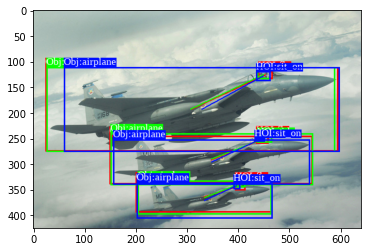

4 Obj:airplane HOI:fly
7 Obj:airplane HOI:ride
8 Obj:airplane HOI:sit_on


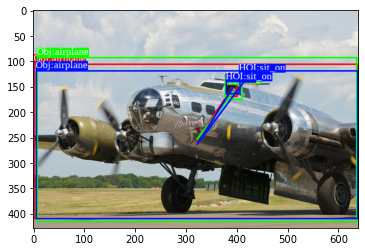

4 Obj:airplane HOI:fly
5 Obj:airplane HOI:inspect
8 Obj:airplane HOI:sit_on


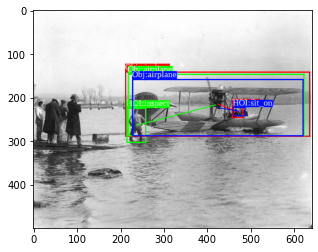

4 Obj:airplane HOI:fly
7 Obj:airplane HOI:ride
8 Obj:airplane HOI:sit_on


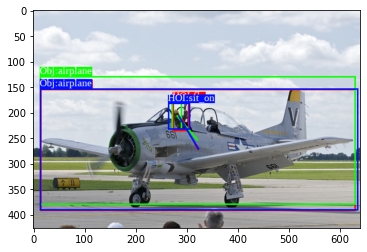

4 Obj:airplane HOI:fly


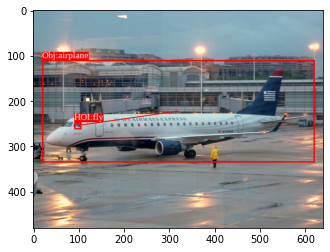

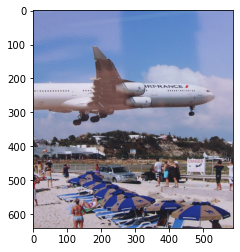

4 Obj:airplane HOI:fly
7 Obj:airplane HOI:ride
8 Obj:airplane HOI:sit_on


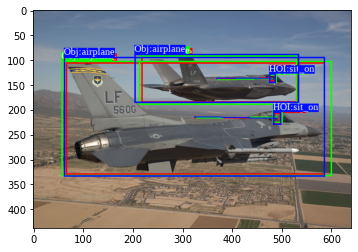

4 Obj:airplane HOI:fly
7 Obj:airplane HOI:ride
8 Obj:airplane HOI:sit_on


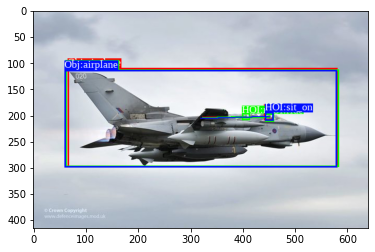

2 Obj:airplane HOI:direct
4 Obj:airplane HOI:fly
8 Obj:airplane HOI:sit_on


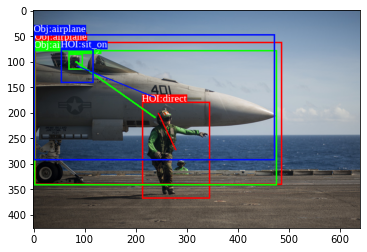

4 Obj:airplane HOI:fly


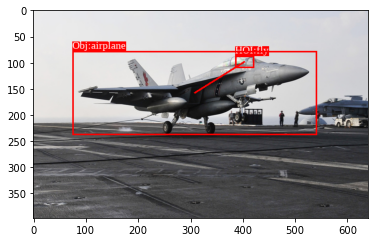

In [5]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", size=20)
count = 1
for bbox_train in anno_bbox['bbox_train'][0]:
    is_skip = True
    for hoi in bbox_train[2][0]:
        if int(hoi[0]) == 4:
            is_skip = False
    if is_skip:
        continue

    img_path = os.path.join('/data/dataset/jikuya/hico_20160224_det/images/train2015/', bbox_train[0][0])
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    cmap = plt.cm.get_cmap("hsv", len(bbox_train[2][0]) + 1)
    for i, hoi in enumerate(bbox_train[2][0]):
        if len(hoi[1]) == 0:
            continue

        color = cmap(i, bytes=True)

        hoi_id = int(hoi[0])-1
        object_name = 'Obj:' + anno_bbox['list_action'][hoi_id][0][0][0]
        hoi_name = 'HOI:' + anno_bbox['list_action'][hoi_id][0][1][0]
        print(hoi_id+1, object_name, hoi_name)
        bbox_human = hoi[1][:][0]
        bbox_object = hoi[2][:][0]

        for index in hoi[3]:
            bbox_hu = bbox_human[int(index[0])-1]
            # print('Human', int(bbox_hu[0]), int(bbox_hu[2]), int(bbox_hu[1]), int(bbox_hu[3]))
            draw.rectangle((int(bbox_hu[0]), int(bbox_hu[2]), int(bbox_hu[1]), int(bbox_hu[3])), outline=color, width=3)
            text_area = draw.textbbox((int(bbox_hu[0]), int(bbox_hu[2])), hoi_name, font=font, anchor="lb")
            draw.rectangle(text_area, fill=color)
            draw.text((int(bbox_hu[0]), int(bbox_hu[2])), hoi_name, fill='white', font=font, anchor="lb")
            bbox_ob = bbox_object[int(index[1])-1]
            # print('Object', int(bbox_ob[0]), int(bbox_ob[2]), int(bbox_ob[1]), int(bbox_ob[3]))
            draw.rectangle((int(bbox_ob[0]), int(bbox_ob[2]), int(bbox_ob[1]), int(bbox_ob[3])), outline=color, width=3)
            text_area = draw.textbbox((int(bbox_ob[0]), int(bbox_ob[2])), object_name, font=font, anchor="lb")
            draw.rectangle(text_area, fill=color)
            draw.text((int(bbox_ob[0]), int(bbox_ob[2])), object_name, fill='white', font=font, anchor="lb")

            draw.line(((int(bbox_ob[0])+int(bbox_ob[1]))/2, (int(bbox_ob[2])+int(bbox_ob[3]))/2, (int(bbox_hu[0])+int(bbox_hu[1]))/2, (int(bbox_hu[2])+int(bbox_hu[3]))/2), fill=color, width=3)
    
    plt.imshow(img)
    plt.show()
    count += 1
    if count > 10:
        break

In [6]:
def autolabel(graph):
    for rect in graph:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', rotation=90)

## オブジェクトごとのバウンディングボックス数

91452


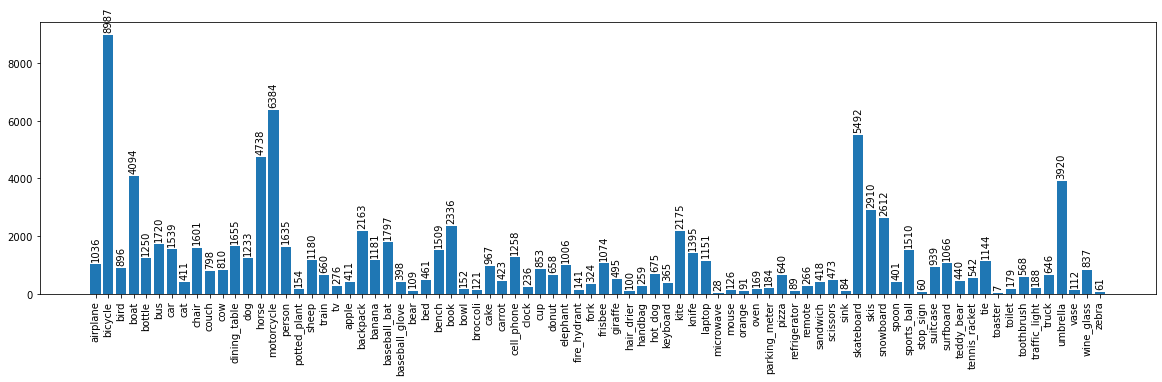

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
graph = plt.bar(objects.keys(), objects.values())

autolabel(graph)
plt.plot()
print(sum(objects.values()))

## オブジェクトごとのインタラクション数

117871


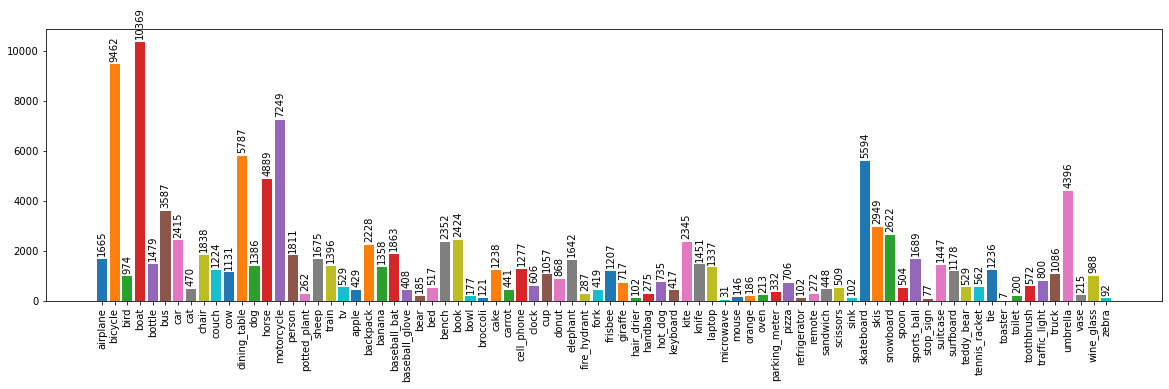

In [9]:
os.makedirs('outputs', exist_ok=True)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# plt.tick_params(labelsize=5)
summ = 0
for key, value in instances.items():
    graph = plt.bar(key, sum(value.values()))
    autolabel(graph)
    summ += sum(value.values())
plt.plot()
plt.savefig('outputs/HICO-DET Train.png')
print(summ)

## HOIごとのオブジェクトの分布

In [ ]:
plt.figure(figsize=(20,5))
plt.title('HICO-DET Train')
plt.xticks(rotation=90)
# plt.tick_params(labelsize=5)
summ = 0
for key, value in instances.items():
    plt.bar(value.keys(), value.values())
    summ += sum(value.values())
plt.plot()
print(summ)

In [ ]:
def object_plot(obj):
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    graph = plt.bar(obj.keys(), obj.values())
    autolabel(graph)
    plt.plot()
    print(f'Max HOI: {max(obj, key=obj.get)} ({max(obj.values())}/{sum(obj.values())})')

## boatクラスのHOI分布

In [ ]:
object_plot(instances['boat'])

In [ ]:
object_plot(instances['bicycle'])

In [ ]:
object_plot(instances['person'])